In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [ ]:
df1=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
df2=df1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df2[df2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
df=df2.drop_duplicates().reset_index(drop=True)
df

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


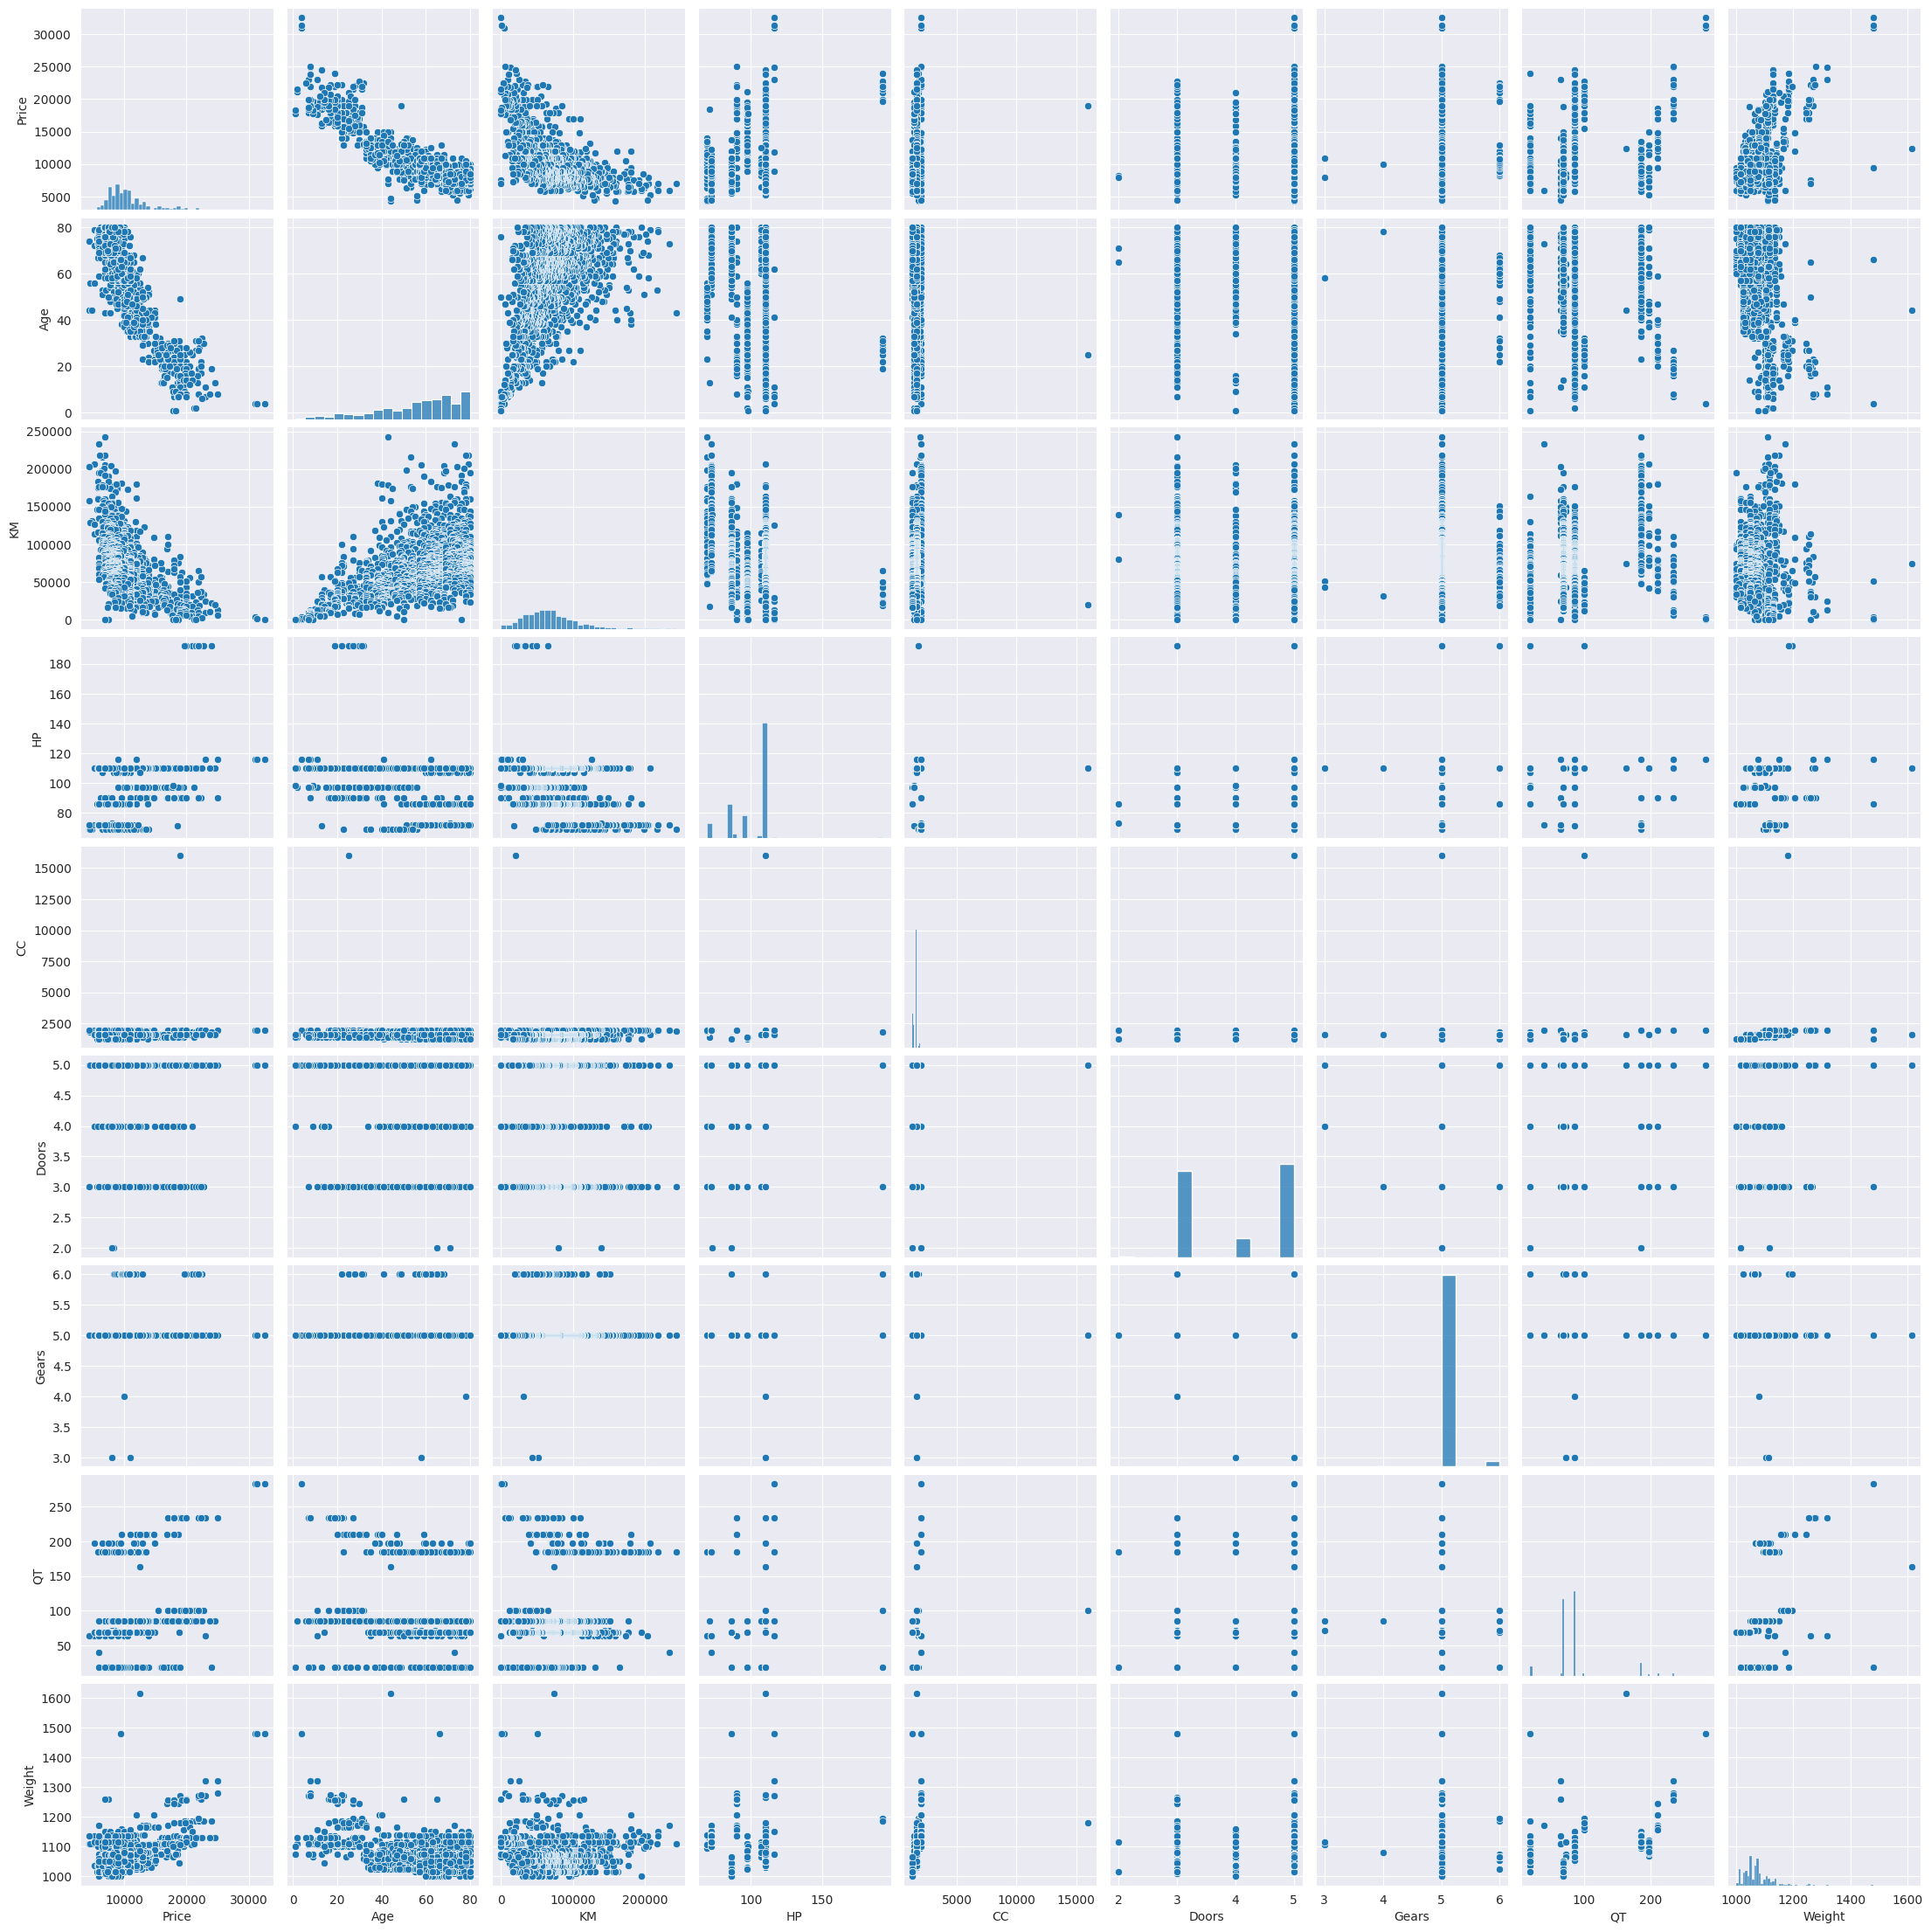

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()

In [ ]:
model.pvalues,model.tvalues

(Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 CC            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Weight        1.031118e-51
 dtype: float64,
 Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64)

In [ ]:
model.rsquared , model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [ ]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'

In [ ]:
slr_c=smf.ols('Price~CC',data=df).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [ ]:
slr_d=smf.ols('Price~Doors',data=df).fit()
slr_d.tvalues , slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [ ]:
mlr_cd=smf.ols('Price~CC+Doors',data=df).fit()
mlr_cd.tvalues , mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

MODEL VALIDATION

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x=df.iloc[:,1:9]

In [ ]:
vif=pd.DataFrame()
vif['Features']=x.columns

In [ ]:
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
print(vif)

  Features         VIF
0      Age   16.392665
1       KM    7.601207
2       HP   64.894446
3       CC   17.186097
4    Doors   21.856114
5    Gears  439.672599
6       QT   11.021647
7   Weight  543.522036


CHECKING THE OUTLIERS

In [ ]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

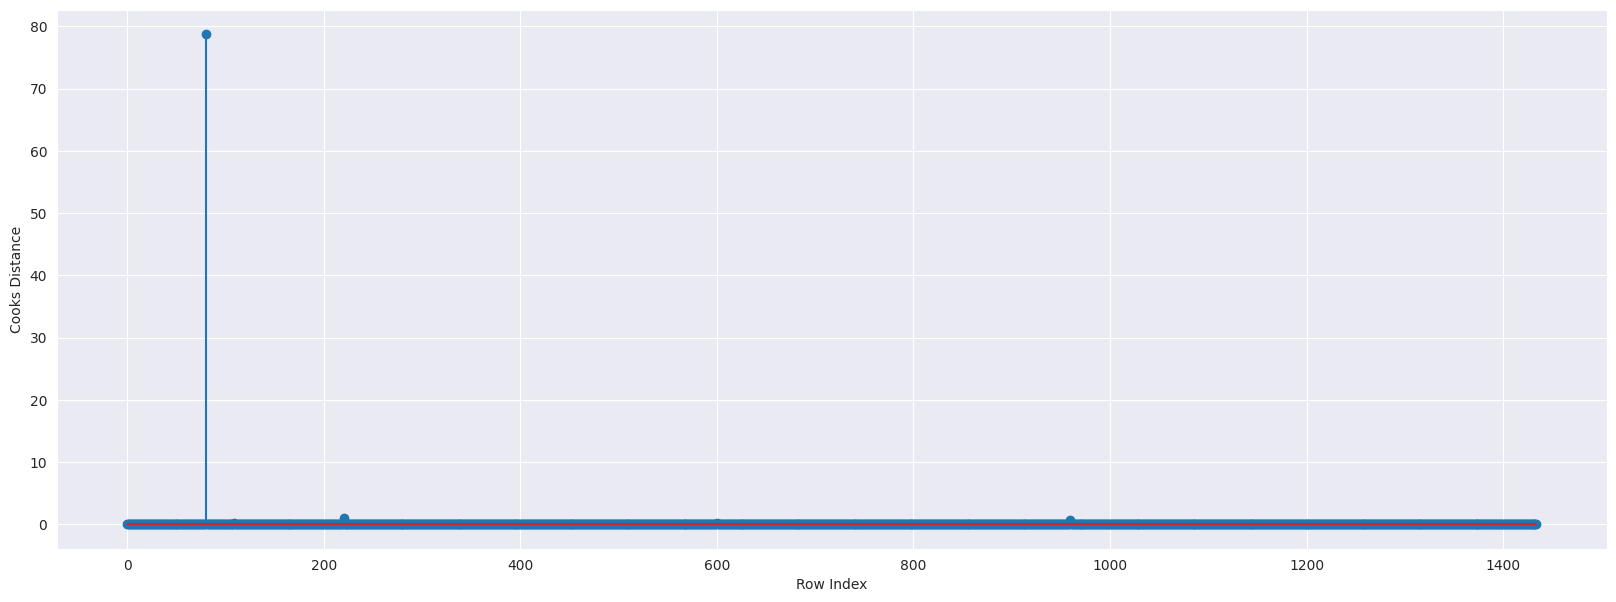

In [ ]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c) , np.max(c)

(80, 78.72950582258932)

IMPROVING THE MODEL

In [ ]:
data2=df.drop(df.index[[80]],axis=0).reset_index(drop=True)
data2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
model2=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=data2).fit()

In [ ]:
model2.params

Intercept   -6197.933399
Age          -120.507430
KM             -0.017799
HP             39.224550
CC             -2.508791
Doors         -26.512930
Gears         527.129216
QT              8.941399
Weight         20.062713
dtype: float64

In [ ]:
(model2.rsquared,model2.rsquared_adj)

(0.8681163912634055, 0.8673759920564632)

PREDICTION

In [ ]:
new_data=pd.DataFrame({'Age':10,"KM":70000,"HP":10,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,10,70000,10,1300,4,5,69,1012


In [ ]:
model2.predict(new_data)

0    11931.87406
dtype: float64

In [ ]:
pred_y=model2.predict(df)
pred_y

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1430     8970.611964
1431     8435.944671
1432     8591.765915
1433     8714.053275
1434     9966.948423
Length: 1435, dtype: float64